In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
from scipy.signal import find_peaks
from tools import feature_extraction, table

### load_data: loads data from the given path. can work with interpolated, accel, or imu data.
Parameters: 
path: Path to the data directory.
Returns:
 df: A dataframe. This dataframe will be different, wheter we are passing in imu data, accel data, or interpolated/merged data

In [8]:

def load_data(file_name):
    # the tap strap has 5 xyz accelerometers
    # and a imu on the thumb. The 
    data = []
    with open(file_name, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    df = pd.DataFrame(data)
    # Break payload into separate columns
    if all(len(i) == 15 for i in df['payload']): # case we are loading in data from the general tap strap 
        df[['thumb_x', 'thumb_y', 'thumb_z', 'index_x', 'index_y', 'index_z', 'middle_x', 'middle_y', 'middle_z', 
            'ring_x', 'ring_y', 'ring_z', 'pinky_x', 'pinky_y', 'pinky_z']] = pd.DataFrame(df['payload'].values.tolist(), index=df.index)
    elif all(len(i) == 6 for i in df['payload']): # case we are loading in imu data for the thumb 
        df[['thumb_imu_x', 'thumb_imu_y', 'thumb_imu_z', 'thumb_imu_pitch', 'thumb_imu_yaw', 'thumb_imu_roll',
            ]] = pd.DataFrame(df['payload'].values.tolist(), index=df.index)
    elif all(len(i) == 21 for i in df['payload']): # case we are loading in merged/interpolated data 
        df[['thumb_imu_x', 'thumb_imu_y', 'thumb_imu_z', 'thumb_imu_pitch', 'thumb_imu_yaw', 'thumb_imu_roll', 'thumb_x', 'thumb_y', 'thumb_z', 'index_x', 'index_y', 'index_z', 'middle_x', 'middle_y', 'middle_z', 
            'ring_x', 'ring_y', 'ring_z', 'pinky_x', 'pinky_y', 'pinky_z' ,
            ]] = pd.DataFrame(df['payload'].values.tolist(), index=df.index)
    else:
        print("Some payloads do not have the expected length of 15 or 6.")
    
    # Drop the original 'payload' column
    df = df.drop(columns=['payload'])
    df
    return df


In [9]:
def calculate_statistics(df):
    # List of fingers and axes
    fingers = ['thumb', 'index', 'middle', 'ring', 'pinky']
    axes = ['x', 'y', 'z']
    
    # Calculate mean and std for each finger's coordinates
    for finger in fingers:
        for axis in axes:
            df[f'{finger}_{axis}_mean'] = df[f'{finger}_{axis}'].mean()
            df[f'{finger}_{axis}_std'] = df[f'{finger}_{axis}'].std()
    
    return df

def plot_data(df, title):
    # List of fingers and axes
    fingers = ['thumb', 'index', 'middle', 'ring', 'pinky']
    axes = ['x', 'y', 'z']
    
    plt.figure(figsize=(10, 5))
    calculate_statistics(df)
    
    for finger in fingers:
        for axis in axes:
            plt.plot(df['timestamp'], df[f'{finger}_{axis}_mean'], label=f'{finger}_{axis}')
    
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Mean Value')
    plt.legend()
    plt.show()

# plot_data(imu_df, 'IMU Data')


### Extensive Plots: will plot the data for each gesture in a separate plot, with the x-axis being the time and the y-axis being the value of the sensor. This will help you visualize the data and get a better understanding of the data.

In [10]:
import matplotlib.pyplot as plt
def extensive_plot_helper(df, x,y_list, folder_name=''):
    plt.figure(figsize=(14,6))
    for y in y_list:
         plt.plot(df[x], df[y], label=y)
    # take y list and turn into a string
    y_list = ', '.join(y_list)
    plt.title(folder_name + " " + str(y_list) + " over time")
    plt.xlabel('Timestamp')
    plt.ylabel('Values')
    plt.legend()

def extensive_plots(accel_df,imu_df, interpolated, folder_name=''): 

    extensive_plot_helper(interpolated, 'timestamp', ['thumb_imu_x', 'thumb_imu_y', 'thumb_imu_z', 'thumb_imu_pitch', 'thumb_imu_yaw', 'thumb_imu_roll'], folder_name + " interpolated")
    extensive_plot_helper(imu_df, 'timestamp', ['thumb_imu_x', 'thumb_imu_y', 'thumb_imu_z', 'thumb_imu_pitch', 'thumb_imu_yaw', 'thumb_imu_roll'], folder_name + " imu")
    extensive_plot_helper(accel_df, 'timestamp', ['thumb_x', 'thumb_y', 'thumb_z'], folder_name + " accel")
    # Do the same for the rest of the fingers
    extensive_plot_helper(accel_df, 'timestamp', ['index_x', 'index_y', 'index_z'], folder_name + " accel")
    # Similarly for middle, ring, and pinky fingers...
    extensive_plot_helper(accel_df, 'timestamp', ['middle_x', 'middle_y', 'middle_z'], folder_name + " accel")
    extensive_plot_helper(accel_df, 'timestamp', ['pinky_x', 'pinky_y', 'pinky_z'], folder_name + " accel")
    extensive_plot_helper(accel_df, 'timestamp', ['pinky_x', 'pinky_y', 'pinky_z'], folder_name + " accel")


/Users/benv/Desktop/SP2024/Masters Project/firefighter-software/tapstrap


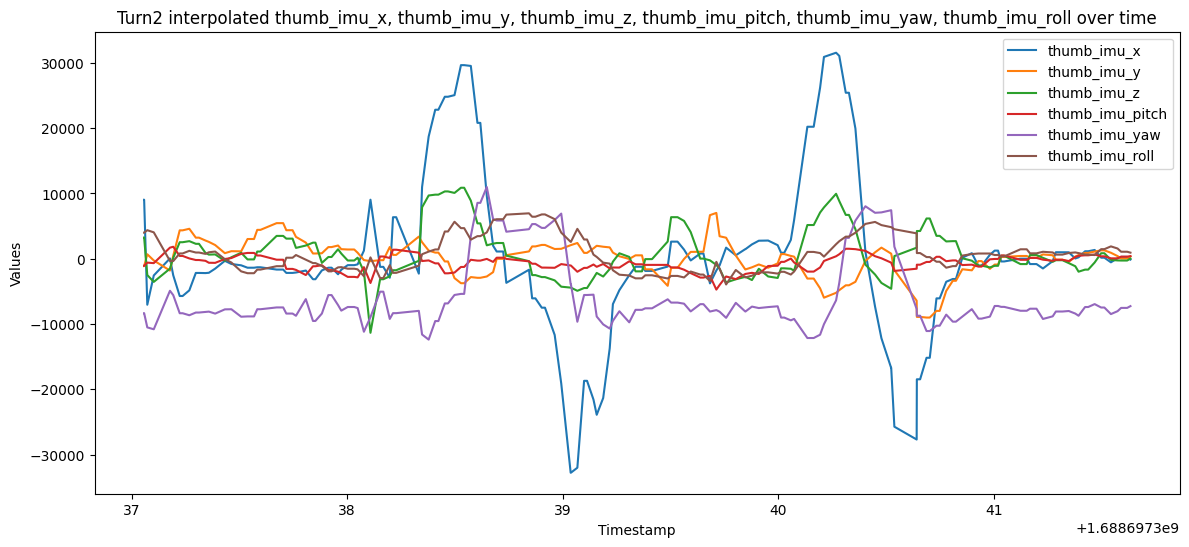

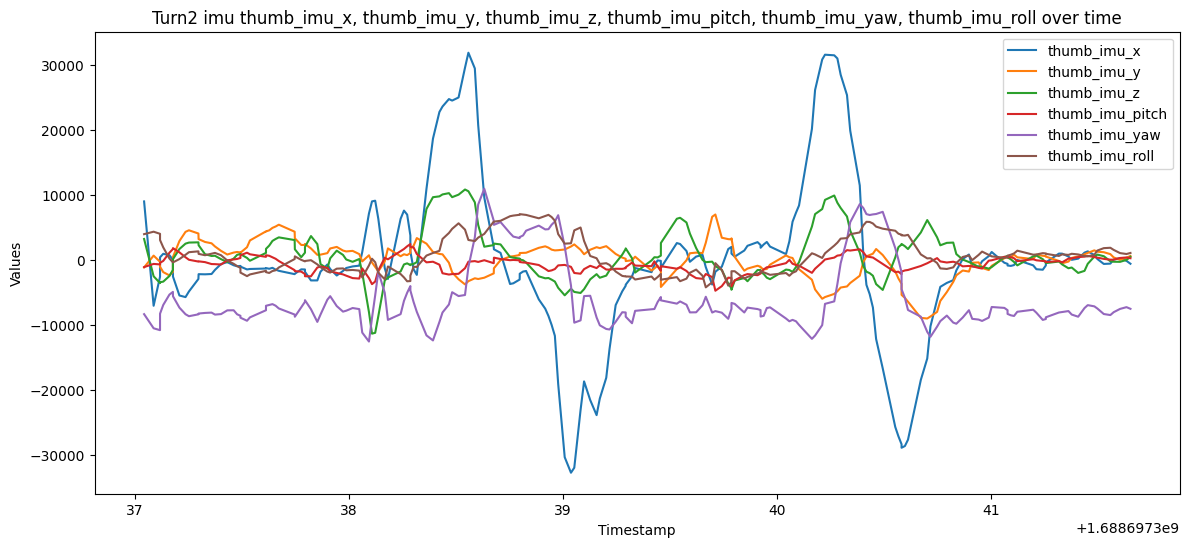

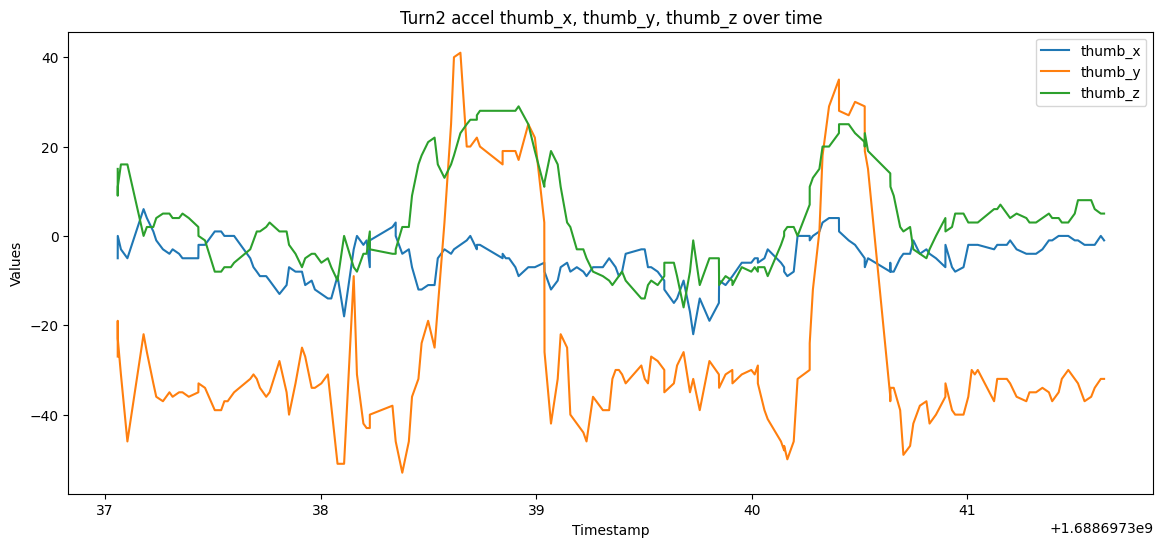

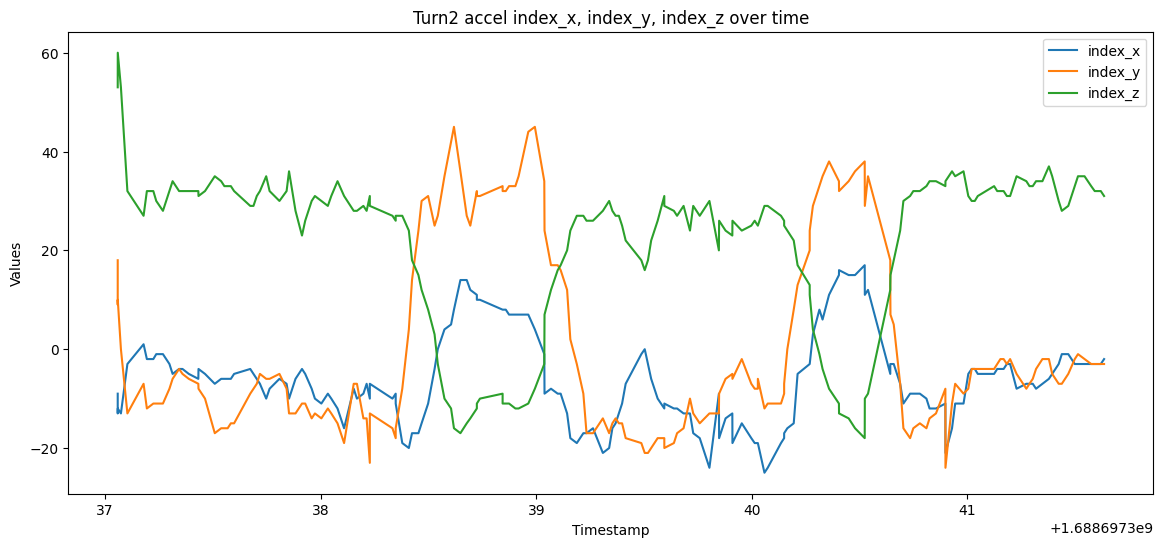

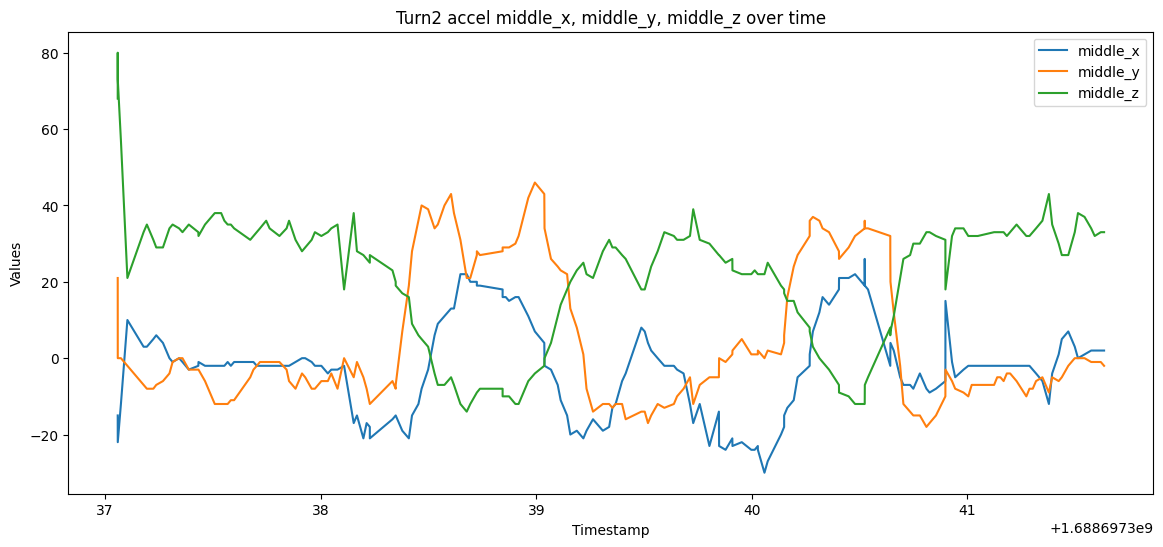

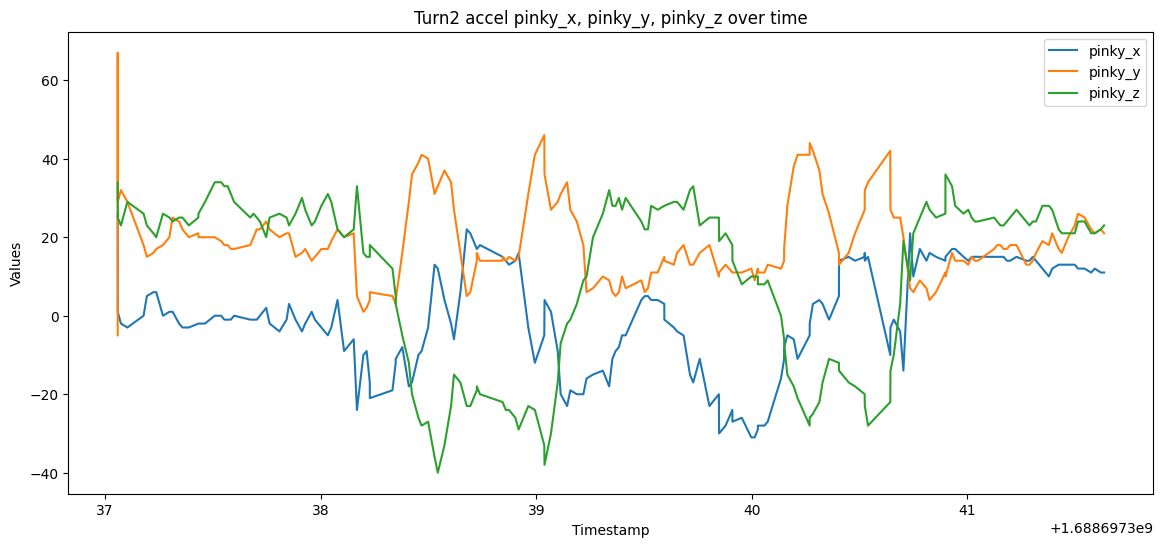

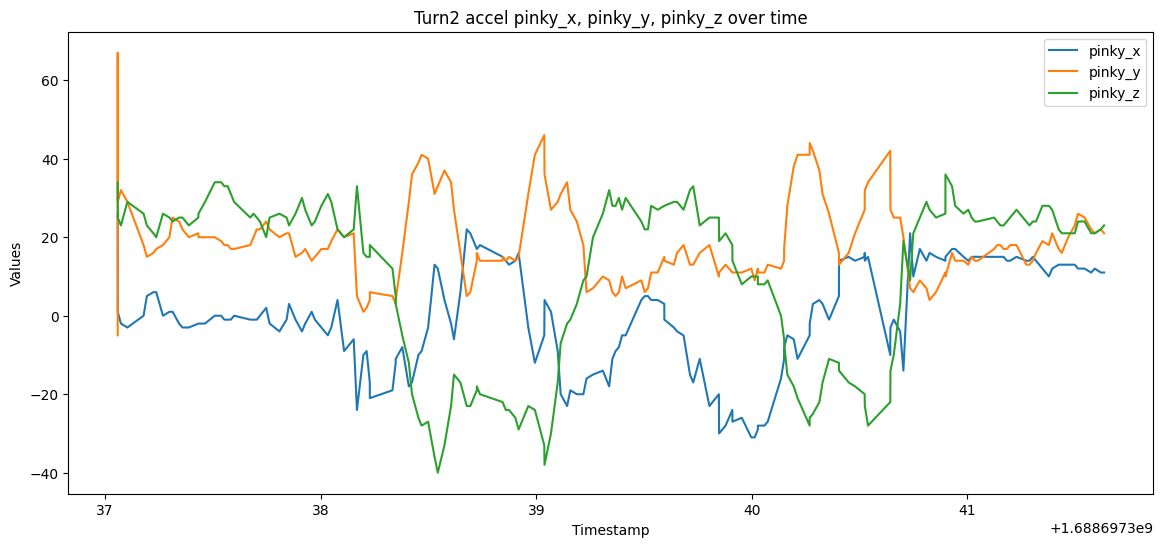

In [5]:
# Load IMU and accelerometer data
# print current directory
print(sys.path[0])
# interpolated test

interpolated_df = load_data('./training_data/data/Turn2/merged_data.json')
imu_df = load_data('./training_data/data/Turn2/imu_data.json')
test_accel_df = load_data('./training_data/data/Turn2/accel_data.json')
extensive_plots(test_accel_df,imu_df, interpolated_df, folder_name='Turn2')


### plot_3d: will plot the data in 3d. This will help you visualize the data and get a better understanding of the data.

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def plot_scatter(df, finger ):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # make thumb_x red, thumb_y green, thumb_z blue
    ax.scatter(df[f'{finger}_x'], df[f'{finger}_y'], df[f'{finger}_z'])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title("f'{finger} IMU Values")
    plt.show()

def plot_3d(df):
    plot_scatter(df, 'thumb')
    plot_scatter(df, 'index')
    plot_scatter(df, 'middle')
    plot_scatter(df, 'ring')
    plot_scatter(df, 'pinky')


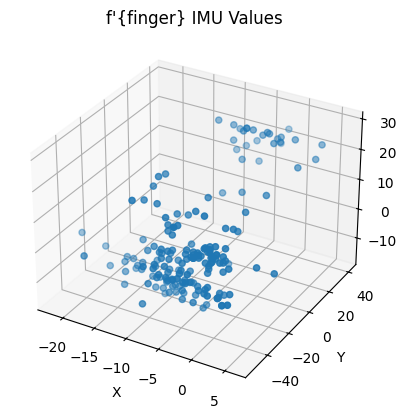

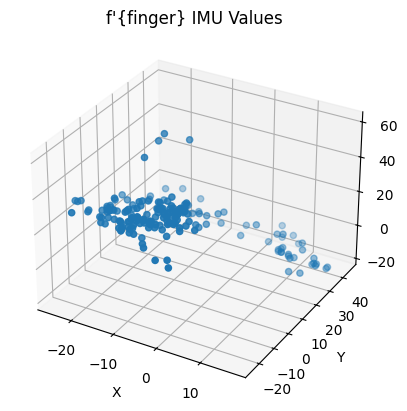

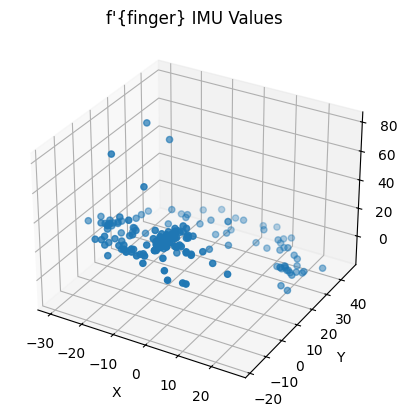

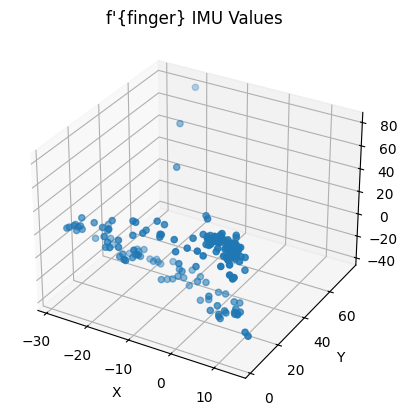

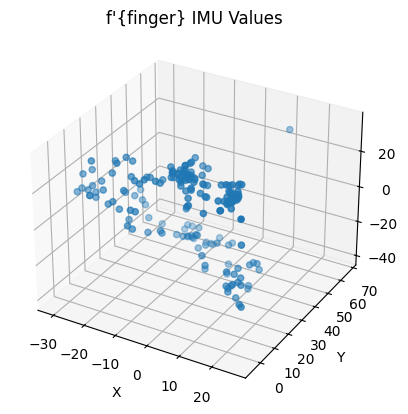

In [7]:
plot_3d(interpolated_df)

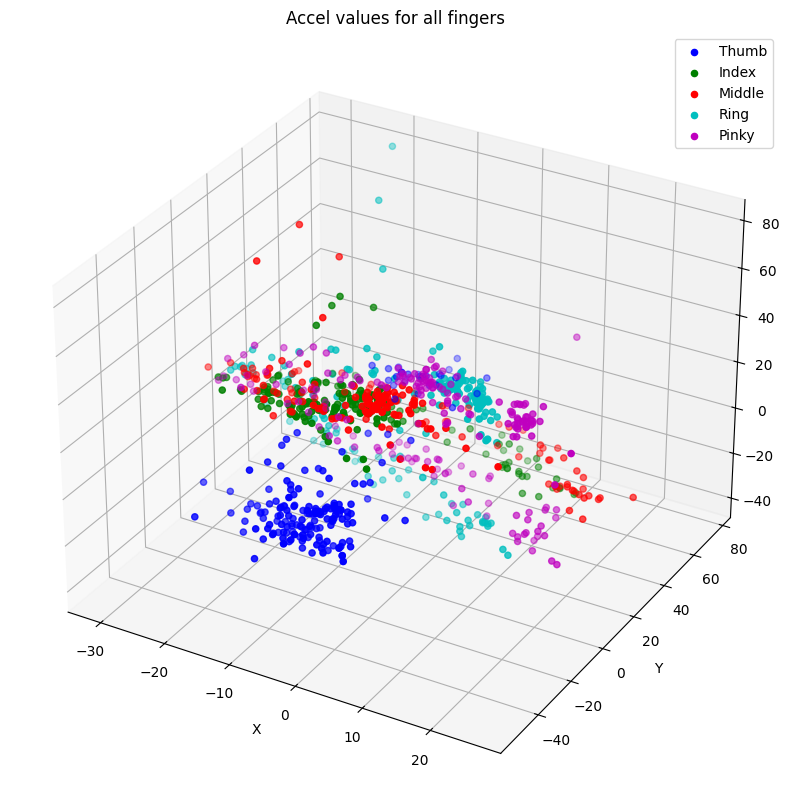

In [8]:
def plot_all(accel_df):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Thumb
    ax.scatter(accel_df['thumb_x'], accel_df['thumb_y'], accel_df['thumb_z'], c='b', label='Thumb')

    # Index
    ax.scatter(accel_df['index_x'], accel_df['index_y'], accel_df['index_z'], c='g', label='Index')

    # Middle
    ax.scatter(accel_df['middle_x'], accel_df['middle_y'], accel_df['middle_z'], c='r', label='Middle')

    # Ring
    ax.scatter(accel_df['ring_x'], accel_df['ring_y'], accel_df['ring_z'], c='c', label='Ring')

    # Pinky
    ax.scatter(accel_df['pinky_x'], accel_df['pinky_y'], accel_df['pinky_z'], c='m', label='Pinky')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.title('Accel values for all fingers')
    plt.show()

plot_all(test_accel_df)

In [9]:
# Repeat the same calculation for other fingers
# Average acceleration magnitude pe
# avg_accel_mag = ((imu_df[['thumb_x', 'thumb_y', 'thumb_z']]**2).sum(axis=1)**0.5).mean()
# print all of the features

In [10]:
# Define list of fingers
fingers = ['thumb', 'index', 'middle', 'ring', 'pinky']

# List to hold features
features = ['thumb_x', 'thumb_y', 'thumb_z', 'index_x', 'index_y', 'index_z', 
            'middle_x', 'middle_y', 'middle_z', 'ring_x', 'ring_y', 'ring_z', 
            'pinky_x', 'pinky_y', 'pinky_z']


In [11]:
# final_features = feature_extraction(accel_df)
feature_extraction(test_accel_df, use_label=True)


NameError: name 'test_accel_df' is not defined

In [2]:
import os
print(os.listdir("./training_data/data/Still2"))
# filter the list to contain folders only with the word "still" in them.

['merged_data.json', 'accel_data.json', 'imu_data.json']


In [21]:
dir_list = os.listdir("./training_data/Glove_Corporation_glove")
# use regex to remove all numbers from the string
import re
unique_names = list(set([re.sub(r'\d+', '', i) for i in dir_list]))
all_names = [re.sub(r'\d+', '', i) for i in dir_list]
print(unique_names)
# remove ds store from the list
if '.DS_Store' in unique_names:
    unique_names.remove('.DS_Store')
automated_gestures_dict = {}
# get unique set of gestures
# for i in unique_names:
#     automated_gestures_dict[i] = len([s for s in dir_list if i in s])
for i in all_names:
    # keep a count of the number of times the gesture appears
    if i in automated_gestures_dict:
        automated_gestures_dict[i] += 1
    else:
        automated_gestures_dict[i] = 1
# print(automated_gestures_dict)
gesture_folders = [(i, automated_gestures_dict[i]) for i in automated_gestures_dict.keys()]
# for i in range(len(gesture_folders)):
    # print(gesture_folders[i][0], ":", gesture_folders[i][1])
# assign 0-n for each gesture label
gesture_labels = [i for i in range(len(automated_gestures_dict))]
# gesture_labels = [(i, automated_gestures_dict[i]) for i in range(len(automated_gestures_dict))]
print(gesture_labels)
print(gesture_folders)

['fist_hand', 'thumbs_up', 'come_here', 'middle_tap', 'two_index_tap', 'thumbs_down', 'two_finger_point', 'index_tap', 'ring_tap']
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[('come_here', 152), ('ring_tap', 152), ('two_index_tap', 151), ('fist_hand', 152), ('thumbs_down', 152), ('thumbs_up', 150), ('index_tap', 151), ('two_finger_point', 151), ('middle_tap', 152)]


In [19]:
# attempt to do the feature extraction with the interpolated data 
# build dictionary of gesture folders and number of folders in each

acc = pd.DataFrame()
count = 0
# '../../data/Still2/imu_data.json'
# folder_name = 'fast_finger_taps'
folder_name = 'Glove_Corporation_glove'
label_count = 0
for gesture_name,number_items in gesture_folders:
    print('looking at ',gesture_name, "with ", number_items, "number of folders" )
    for  i in range(number_items):
        if i == 0:
            continue # this is becasue we arent starting with 0 
        # load the data
        file_name = str(f'training_data/{folder_name}/{gesture_name}{i}/merged_data.json')
        ndf = load_data(file_name)
        # assign label to the gesture
        # depending on the folder name, assign a label
        features = feature_extraction(ndf, use_label = True, assign_label=label_count,interpolated=True,normalize=True)#,speedup_multiplier=2)
        count += 1
        acc = pd.concat([acc, features], ignore_index=True)
    print("gesture_name:", gesture_name, "label:", label_count)
    label_count += 1

# add still data from the data_2 folder into our acc
gesture_name = 'still'
num_still = 400
print('looking at ',gesture_name, "with ", num_still, "number of folders" )
for  i in range(num_still):
    if i == 0:
        continue # this is becasue we arent starting with 0 
    # load the data
    file_name = str(f'training_data/data_2/{gesture_name}{i}/merged_data.json')
    ndf = load_data(file_name)
    features = feature_extraction(ndf, use_label = True, interpolated=True, assign_label=10, normalize=True)
    count += 1
    acc = pd.concat([acc, features], ignore_index=True)
# print("total appendage count", count)
# table(acc)
final_data = acc
print("final data shape", final_data.shape)
print("total appendage count", count)
# print label id for each gesture
print(acc['label'].value_counts())

looking at  come_here with  152 number of folders
gesture_name: come_here label: 0
looking at  ring_tap with  152 number of folders
gesture_name: ring_tap label: 1
looking at  two_index_tap with  150 number of folders
gesture_name: two_index_tap label: 2
looking at  fist_hand with  152 number of folders
gesture_name: fist_hand label: 3
looking at  thumbs_down with  152 number of folders
gesture_name: thumbs_down label: 4
looking at  thumbs_up with  151 number of folders
gesture_name: thumbs_up label: 5
looking at  index_tap with  150 number of folders
gesture_name: index_tap label: 6
looking at  two_finger_point with  151 number of folders
gesture_name: two_finger_point label: 7
looking at  middle_tap with  150 number of folders
gesture_name: middle_tap label: 8
looking at  still with  400 number of folders
final data shape (1750, 174)
total appendage count 1750
label
10    399
0     151
1     151
3     151
4     151
5     150
7     150
2     149
6     149
8     149
Name: count, dtype:

For Our feature extraction, we will be using the following features:
1. Mean
2. Standard Deviation
3. Median
4. Max
5. Min
6. Range
7. Interquartile Range
8. Skewness
9. Kurtosis
10. Zero Crossing Rate
11. Mean Absolute Deviation
12. Root Mean Square

### Non interpolated data feature extraction: This function will extract the features from the non interpolated data. It will return a dataframe with the features and the labels.

In [ ]:
# X = extract_features(X)
# iterate through the "still" folders, perform the feature extraction on each one, and add it to the dataframe
# get the number of folders in the still directory

# dir_list = os.listdir("./training_data/data")

# num_still_folders = len([i for i in dir_list if "Still" in i])
# num_turn_folders = len([i for i in dir_list if "Turn" in i])
# num_lever_folders = len([i for i in dir_list if "lever" in i])
# gesture_folders = [('Lever', num_lever_folders), ('Turn', num_turn_folders), ('Still', num_still_folders) ] # will refcator this into a simpler loop
# print("Gesture Folders: ", gesture_folders)
# acc = pd.DataFrame()
# count = 0
# # '../../data/Still2/imu_data.json'
# for gesture_name,number_items in gesture_folders:
#     print('looking at ',gesture_name, "with ", number_items, "number of folders" )
#     for  i in range(number_items):
#         # load the data
#         file_name = str(f'training_data/data/{gesture_name}{i}/accel_data.json')
#         ndf = load_data(file_name)
#         features = feature_extraction(ndf, use_label = True)
#         count += 1
#         acc = pd.concat([acc, features], ignore_index=True)


# # print("total appendage count", count)
# table(acc)
# final_data = acc


In [ ]:
# print(final_data)
# table(final_data)

### Initial Training: This function will train the model on the training data and return the model. This function will also print out the accuracy of the model on the training data.

head:    variance_thumb_imu_x  variance_thumb_imu_y  variance_thumb_imu_z  \
0              0.018680              0.019675              0.014929   
1              0.020679              0.040464              0.024003   
2              0.023642              0.043440              0.041532   
3              0.027632              0.045675              0.028512   
4              0.028998              0.061560              0.030914   

   variance_thumb_imu_pitch  variance_thumb_imu_yaw  variance_thumb_imu_roll  \
0                  0.016632                0.018275                 0.034745   
1                  0.013654                0.022225                 0.025094   
2                  0.016979                0.016987                 0.021813   
3                  0.008598                0.021279                 0.018462   
4                  0.020887                0.018557                 0.029264   

   variance_thumb_x  variance_thumb_y  variance_thumb_z  variance_index_x  \
0        

/Users/katisomabulu/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier
Accuracy: 0.8971428571428571
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.92      0.79      0.85        14
           2       0.92      0.85      0.88        13
           3       1.00      1.00      1.00        13
           4       0.81      0.65      0.72        20
           5       0.53      0.75      0.62        12
           6       0.95      0.95      0.95        20
           7       1.00      1.00      1.00        13
           8       1.00      0.90      0.95        10
          10       0.93      0.97      0.95        39

    accuracy                           0.90       175
   macro avg       0.90      0.89      0.89       175
weighted avg       0.91      0.90      0.90       175



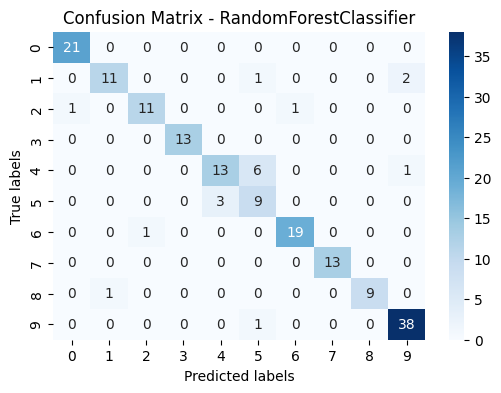

Feature Importance Ranking:
                            Feature  Importance
141       time_between_peaks_ring_x    0.019011
105  avg_abs_diff_accel_thumb_imu_x    0.018419
136      time_between_peaks_index_y    0.016901
44             kurtosis_thumb_imu_z    0.016189
116      avg_abs_diff_accel_index_z    0.015938
..                              ...         ...
157         avg_jerk_thumb_imu_roll    0.001274
153            avg_jerk_thumb_imu_y    0.001250
164               avg_jerk_middle_x    0.001134
159                avg_jerk_thumb_y    0.001106
156          avg_jerk_thumb_imu_yaw    0.001086

[173 rows x 2 columns]


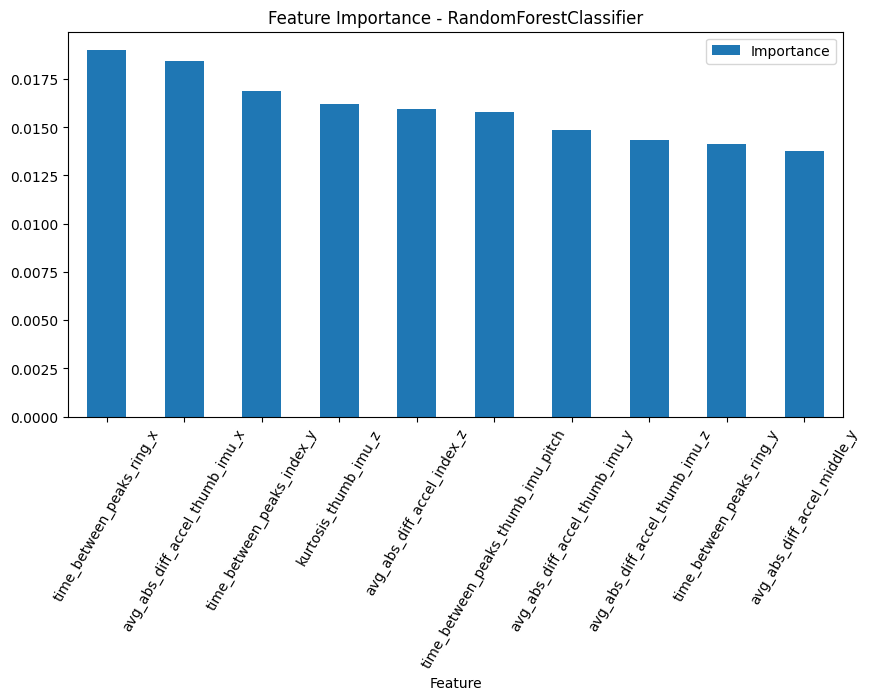


KNeighborsClassifier
Accuracy: 0.8285714285714286
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
           1       1.00      0.57      0.73        14
           2       0.69      0.85      0.76        13
           3       1.00      1.00      1.00        13
           4       0.73      0.95      0.83        20
           5       0.71      0.42      0.53        12
           6       0.92      0.60      0.73        20
           7       0.87      1.00      0.93        13
           8       0.71      1.00      0.83        10
          10       0.89      0.85      0.87        39

    accuracy                           0.83       175
   macro avg       0.83      0.82      0.81       175
weighted avg       0.84      0.83      0.82       175



/Users/katisomabulu/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


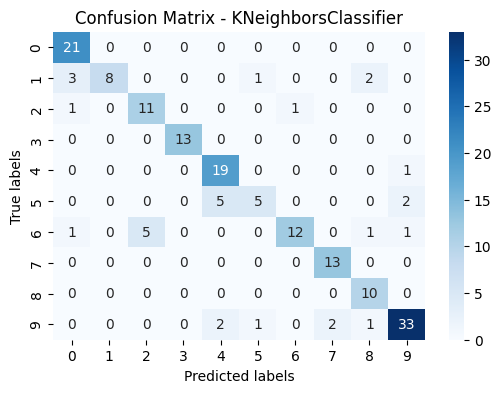

RandomForestClassifier accuracy:  0.8971428571428571
KNeighborsClassifier accuracy:  0.8285714285714286


In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

classifiers = [
    RandomForestClassifier(n_estimators=200), # n estimators refers to the number of trees in the forest
    # RandomForestClassifier(n_estimators=1000, criterion='entropy'), # n estimators refers to the number of trees in the forest

    KNeighborsClassifier(n_neighbors=10), # n_neighbors is the number of neighbors to use by default for kneighbors queries.
    # the higher the neighbors the more accurate the model will be
    # SVC(kernel="linear"),# C represents the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.
    # SVC(kernel="linear", degree=3, C=1),
    # SVC(kernel="rbf", degree=3, C=1),
    # KNeighborsClassifier(),
    # LogisticRegression()
]
# implement histogram of oriented
# classifiers = [
    # RandomForestClassifier(n_estimators=500), # n_estimators is the number of trees in the forest.
    # SVC(kernel="linear"),# C represents the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.
    # KNeighborsClassifier(n_neighbors=10), # n_neighbors is the number of neighbors to use by default for kneighbors queries.
    # LogisticRegression( solver='lbfgs', multi_class='multinomial') # solver is the algorithm to use in the optimization problem, and multi_class is the strategy to use for multiclass problems.
# ]

# drop all rows with nan values
final_data = final_data.fillna(0)
print("head:", final_data.head())
final_data = final_data.sample(frac=1).reset_index(drop=True) # shuffle the data, and reset the index, drop=True means we don't want to keep the old index
X = final_data.drop('label', axis=1)  # Use all columns except 'label' as features
# print(final_data)

# obtain only the label column
y = final_data['label'] # Use 'label' as the target
y = pd.DataFrame(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # random state is the seed used by the random number generator

# get the number of unique labels
num_labels = len(y['label'].unique())
print("Number of unique labels: ", num_labels)

trained_models = []

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(type(classifier).__name__)
    print("Accuracy:", accuracy)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    # use the folder names for the x and y labels
    # use the labels for the x and y labels
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    # sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=, yticklabels=[a[0] for a in gesture_folders])
    # sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[], yticklabels=['Still', 'Turn', 'Lever'])
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix - {type(classifier).__name__}")
    plt.show()
    trained_models.append(classifier)  # Save the trained model for later use
    feature_names = list(X.columns)
    if isinstance(classifier, RandomForestClassifier):
        feature_importances = classifier.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        })
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        print("Feature Importance Ranking:")
        print(importance_df)
        # put the imporance df into a file named importance.txt
        importance_df.to_csv(f'importance_{type(classifier).__name__}.txt', index=False)
        # take the top 10 features and plot them
        importance_df = importance_df.head(10)
        # put the importance df in a bar chart for visualization
        importance_df.plot.bar(x='Feature', y='Importance',  rot=60, title=f'Feature Importance - {type(classifier).__name__}', figsize=(10, 5))
        plt.title(f'Feature Importance - {type(classifier).__name__}')
        plt.show()
        print()
# save the files using sklearn 

# Save the trained models
for i, model in enumerate(trained_models):
    # joblib.dump(model, f'models/{type(model).__name__}_{i}.pkl')
    joblib.dump(model, f'models/{type(model).__name__}.pkl')

# make a table to show the accuracy of each model
for i, model in enumerate(trained_models):
    print(type(model).__name__, "accuracy: ", accuracy_score(y_test, model.predict(X_test)))



## This is an attempt to use the interpolated sensor data, but now using tensorflow and a neural network. This is a work in progress.

In [ ]:
# upload model and do inference in real time 
# load the model from disk  
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume X_train, X_test, y_train, y_test are your training and test sets
final_data = final_data.sample(frac=1).reset_index(drop=True) # shuffle the data, and reset the index, drop=True means we don't want to keep the old index
X = final_data.drop('label', axis=1)  # Use all columns except 'label' as features
# print(final_data)

# obtain only the label column
y = final_data['label'] # Use 'label' as the target
y = pd.DataFrame(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) # random state is the seed used by the random number generator


# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train_scaled.shape", X_train_scaled.shape)
# print number of features going into neural network
print("X_train_scaled.shape[1]", X_train_scaled.shape[1])

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    # tf.keras.layers.Dense(1, activation='sigmoid')
    # output layer should be 3 for the 3 classes
    # we want 0, 1 or 2 for the final output
    tf.keras.layers.Dense(5, activation='softmax')
    # tf.keras.layers.Dense(3, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',  # You can use other optimizers as well
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels (0, 1, 2)
              metrics=['accuracy'])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy', 'Precision', 'Recall'])

# Train the model
# the batch size refers to the number of training examples utilized in one iteration
# in terms of accelerometers, this is the number of rows of data that are used to train the model at once
model.fit(X_train_scaled, y_train, epochs=10, batch_size=64) 
# model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)
# Make predictions on the test set
# use the 
# print("y_pred", y_pred)

#  classifier.fit(X_train, y_train)
    # y_pred = classifier.predict(X_test)
    # accuracy = accuracy_score(y_test, y_pred)
    # report = classification_report(y_test, y_pred)
y_pred_proba = model.predict(X_test_scaled)
# we have 3 different classes, so we need to change the threshold to 0.33, 0.66, and 1.0
# y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions
# y_pred = (y_pred_proba > 0.66).astype(int)  # Convert probabilities to binary predictions
# y_pred = (y_pred_proba > 0.33).astype(int)  # Convert probabilities to binary predictions


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# print head of y_pred
print("y_pred", y_pred)
classification_report = classification_report(y_test, y_pred)
# make a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)




In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Assuming final_data is your DataFrame with features and labels
print("len final fdata " , len(final_data))
# Shuffle the data and reset the index
final_data = final_data.sample(frac=1).reset_index(drop=True)

# Separate features (X) and labels (y)
X = final_data.drop('label', axis=1)
y = final_data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# print len of X_train
print("len of X_train", len(X_train))

# Standardize the input features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train
X_test_scaled = X_test

# Print the shape and number of features going into the neural network
print("X_train_scaled.shape:", X_train_scaled.shape)
print("Number of features:", X_train_scaled.shape[1])

# Define the neural network model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 units for 3 classes
# ])

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),  # Adding dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),  # Adding dropout for regularization
    tf.keras.layers.Dense(3, activation='softmax')
]) 

# Compile the model
model.compile(optimizer='adam',  # You can use other optimizers as well
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels (0, 1, 2)
              metrics=['accuracy'])

# Train the model (you need to have y_train as integer labels for this)
model.fit(X_train_scaled, y_train, epochs=10, batch_size=60, validation_split=0.2, verbose=0)


# Evaluate the model on the test set
predictions = model.predict(X_test_scaled)
print("predictions", predictions)
predicted_labels = np.argmax(predictions, axis=1)

# Generate and print the classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", report)
y_test_reset = y_test.reset_index(drop=True)
conf_matrix = confusion_matrix(y_test_reset, predicted_labels)

# Plot the heatmap

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Still', 'Turn', 'Lever'], yticklabels=['Still', 'Turn', 'Lever'])
#



In [ ]:
X_train_scaled.shape[0]

### Classification via SVM: This function will classify the data using SVM. It will return the accuracy of the model on the test data.

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Shuffle the data
final_data = final_data.sample(frac=1).reset_index(drop=True)

# Split the data into features (X) and target (y)
X = final_data.drop('label', axis=1)
y = final_data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an SVM classifier
svm_clf = SVC()

# Train the classifier
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_report)

# Additional scores
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# import pca
from sklearn.decomposition import PCA
# Assume that feature_names is a list of your feature names in the same order as in your training data
feature_names = ['feature1', 'feature2', 'feature3', ...]  # replace with your actual feature names

classifiers = [
    RandomForestClassifier(n_estimators=100),
    SVC(),
    KNeighborsClassifier(),
    LogisticRegression()
]

# Perform PCA
pca = PCA(n_components=2)  # adjust number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

for classifier in classifiers:
    # Train and evaluate model with PCA data
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(type(classifier).__name__)
    print("Accuracy:", accuracy)
    print(report)
    print()

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix - {type(classifier).__name__}")
    plt.show()

    # Save the model
    joblib.dump(classifier, f'models/{type(classifier).__name__}.pkl')

    # Feature importance rating (only applicable for RandomForestClassifier)
    



In [ ]:
# classification via a convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'features' is your DataFrame and 'labels' is your target
X = features.values.reshape(-1, features.shape[1], 1)  # reshaping for CNN
y = final_data['label'] # Use 'label' as the target
y = pd.DataFrame(y).T

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, verbose=1)

# Evaluate the model
model.evaluate(X_test, y_test)


In [ ]:

# Plot IMU data
plot_data(imu_df, 'IMU Data')

# Plot accelerometer data
plot_data(new_dataframe, 'Accelerometer Data')

### new idea: use a LSTM RNN to use each of the sets of data to correctly train a lstm neural network to understand the sequences of data that we are getting from our data.
### pull some code from INL stuff. 
## use the data from the imu and accel data to train the lstm neural network.

In [ ]:
# def extract_features(df, labels):
#     # Convert payload lists into a DataFrame
#     features = ['thumb_x', 'thumb_y', 'thumb_z', 'index_x', 'index_y', 'index_z', 
#             'middle_x', 'middle_y', 'middle_z', 'ring_x', 'ring_y', 'ring_z', 
#             'pinky_x', 'pinky_y', 'pinky_z']
#     accel_df = pd.DataFrame(df[features])
#     # Add labels to the DataFrame
#     # get hte label from the df
#     accel_df['label'] = labels
# #     print(accel_df['label'])

#     # Feature extraction
#     avg_accel = accel_df.groupby('label').mean()
#     std_dev_accel = accel_df.groupby('label').std()
#     avg_abs_diff_accel = accel_df.groupby('label').apply(lambda x: x.diff().abs().mean())
#     avg_accel_mag = accel_df.groupby('label').apply(lambda x: ((x**2).sum(axis=1)**0.5).mean())

# #     time_between_peaks = accel_df.groupby('label').apply(lambda x: x.apply(lambda y: np.mean(np.diff(np.where((np.diff(y > 0) & (y > np.mean(y))))))))
#     binned_distribution = accel_df.groupby('label').apply(lambda x: (np.histogram(x, bins=10)[0]).tolist())

#     # Combine all features into a single DataFrame
#     feature_data = pd.concat([avg_accel, 
#                               std_dev_accel, 
#                               avg_abs_diff_accel, 
#                               avg_accel_mag, 
#                         #       time_between_peaks,
#                               binned_distribution], axis=1)
#     return feature_data


# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# # show one entry of data_df
# # print(data_df)
# feature_df = extract_features(data_df, labels)
# # print(feature_df)

# # 'feature_df' is your DataFrame of features and 'label' is your target
# # X = feature_df.drop('label', axis=1)  # Use all columns except 'label' as features
# X = feature_df  # Use all columns except 'label' as features
# # print(feature_df[0])
# y = labels # Use 'label' as the target
# print(X)

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize a Random Forest classifier
# rf_clf = RandomForestClassifier(n_estimators=100)

# # Train the classifier
# rf_clf.fit(X_train, y_train)

# # Make predictions
# y_pred = rf_clf.predict(X_test)

# # Evaluate the classifier
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [ ]:
# import pandas as pd

# def load_labeled_data(file_name):
#     data = []
#     with open(file_name, 'r') as f:
#         for line in f:
#             data.append(json.loads(line))
    
#     df = pd.DataFrame(data)
#     # df = pd.DataFrame(data)

#     # Break payload into separate columns
#     df[['thumb_x', 'thumb_y', 'thumb_z', 'index_x', 'index_y', 'index_z', 'middle_x', 'middle_y', 'middle_z', 
#        'ring_x', 'ring_y', 'ring_z', 'pinky_x', 'pinky_y', 'pinky_z']] = pd.DataFrame(df['payload'].values.tolist(), index=df.index)

#     # Drop the original 'payload' column
#     df = df.drop(columns=['payload'])

#     # Separate features from labels
#     X = df.drop(columns=['label'])
#     y = df['label']

#     return X, y

# # Loading data
# X, y = load_labeled_data('../../data/Merged.json')
# # print(X)

In [ ]:
# # Import pandas
# import pandas as pd

# # concatenate all the features 
# concatenated_features = pd.DataFrame.from_dict(avg_accel, orient='index', columns=['avg_accel'])
# concatenated_features = pd.concat([ #std_dev_accel,
#                                    # avg_abs_diff_accel_df,
#                                      avg_accel_mag_df, 
#                                       time_between_peaks_df, 
#                                    #   binned_distribution_df
#                                       ], axis=1)
# print(concatenated_features.head())
# Combine all features into a single DataFrame
# feature_data = pd.concat([
#     avg_accel, 
#     # std_dev_accel, 
#     # avg_abs_diff_accel_df, 
#     # avg_accel_mag_df, 
#     # time_between_peaks_df,
#     # binned_distribution_df
# ], axis=1)
# print("Feature Data\n", feature_data[0])
# panda_avg_accel = pd.DataFrame(avg_accel)
# type(panda_avg_accel)
# print(panda_avg_accel)
# p
# Check the combined DataFrame
# print(feature_data.head())